In [1]:
import networkx as nx
import numpy as np
from GraphMatrix import GraphMatrix
from SpanningTrees import SpanningTrees

# Demonstration and usage examples
In this section we will try different input graphs and matrices – fully connected graph with four vertices, Petersen's graph and random graphs generated by Erdös-Renyi Process


### K4 fully connected graph

In [2]:
k4_adjacency = np.ones((4, 4)) - np.diag(np.ones(4))
print(k4_adjacency)

[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


Given adjacency matrix, we need degree matrix and by substracting it we get laplacian matrix.
Number of spanning trees is then a subdeterminant of laplacian matrix.

In [12]:
k4 = GraphMatrix() 
k4.adjacency_matrix = k4_adjacency
k4.compute_remaining_matrices()
print("Degree matrix")
print(k4.degree_matrix)
print("Laplacian matrix")
print(k4.laplacian_matrix)


Degree matrix
[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]
Laplacian matrix
[[ 3. -1. -1. -1.]
 [-1.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [-1. -1. -1.  3.]]


In [13]:
print("Number of spanning trees")
print(k4.adjugate_subdeterminant)

Number of spanning trees
16


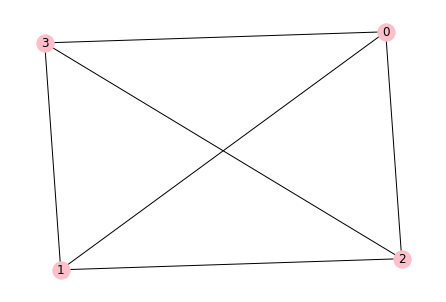

In [3]:
k4_trees = SpanningTrees(nx.from_numpy_matrix(k4_adjacency))
k4_trees.preview()

### Recursively searching and visualising spanning trees
#### source: SpanningTrees.process()
Spanning tree is induced subgraph of the given graph, that is connected and has no cycles, therefore being a tree.

- Function works as binary tree, where each node is an induced subgraph and in each level we are selecting and removing one edge. 
- Leaves of the tree are possible spanning trees (where every possible edge was removed)
- We are using recursion and passing fixed edges and number of iteration
1. In every iteration we are choosing edge for removal and fixation with following conditions:
    1. edge should be new (not previously chosen)
    2. its removal should not affect connectedness
    3. its fixation should not create cycle of fixed edges
2. Then we are fixing the edge (creating left children) and removing it from the graph (creating right children)
3. In next iteration we repeat the same procedure for left and right children, until we reach the leaves of the tree.

Algorithm has time and memory complexity O(2^n) which is maximum number of spanning trees in fully connected graphs.

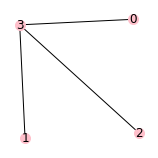

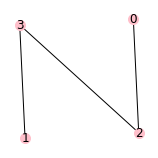

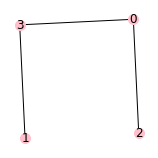

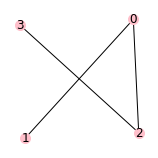

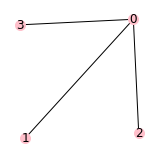

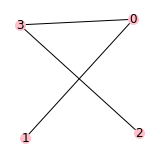

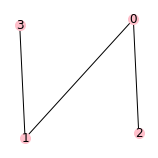

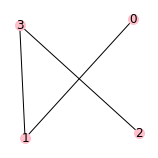

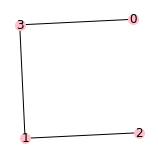

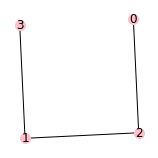

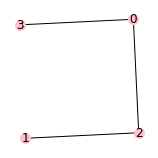

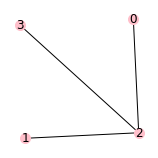

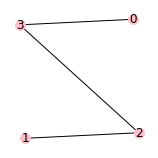

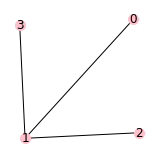

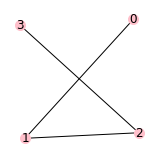

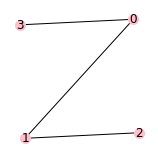

In [4]:
k4_trees.process()

### Erdös-Renyi graphs

Spanning trees count 8


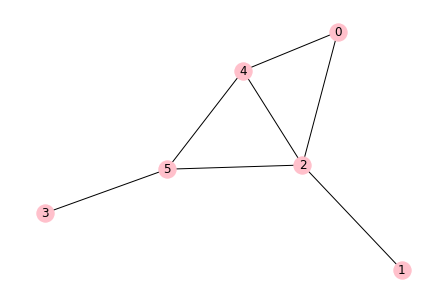

In [5]:
vertices = 6
edge_probability = 0.5
G = nx.erdos_renyi_graph(vertices, edge_probability, seed=15, directed=False)

random_graph = SpanningTrees(G)
print("Spanning trees count", random_graph.spanning_trees_count())
random_graph.preview()


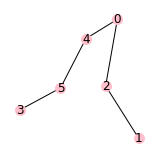

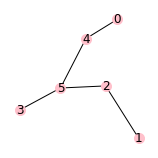

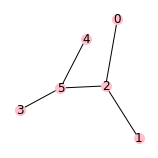

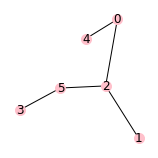

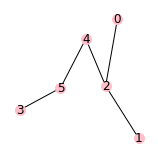

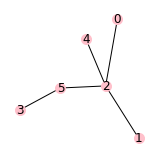

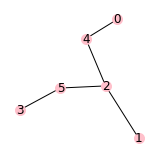

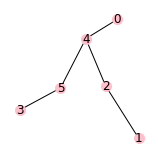

In [6]:
random_graph.process()

Spanning trees count 21


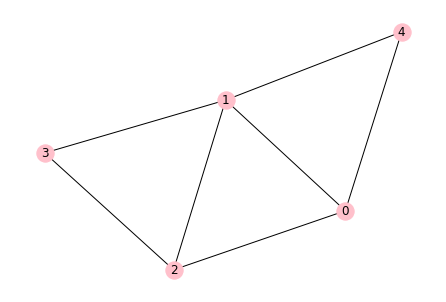

In [7]:
vertices = 5
edge_probability = 0.6
G = nx.erdos_renyi_graph(vertices, edge_probability, seed=11, directed=False)

random_graph = SpanningTrees(G)
print("Spanning trees count", random_graph.spanning_trees_count())
random_graph.preview()

/Users/miroslavlzicar/Library/Mobile Documents/com~apple~CloudDocs/GitHub/zapoctove_programy_zkouseni/SpanningTrees.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  return


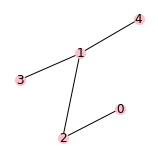

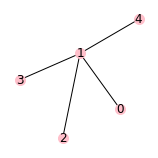

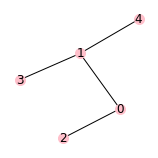

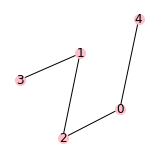

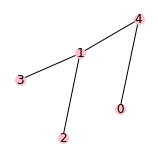

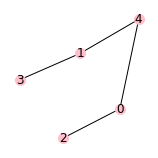

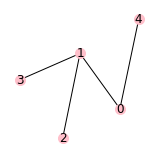

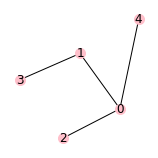

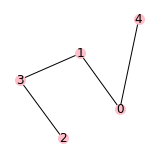

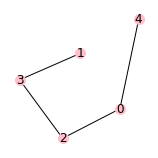

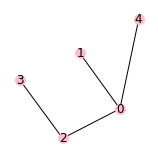

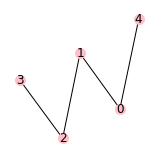

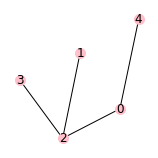

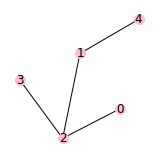

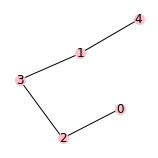

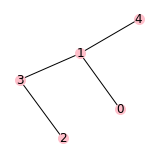

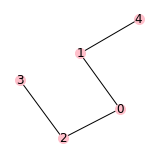

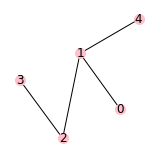

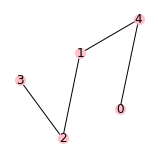

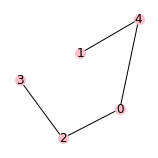

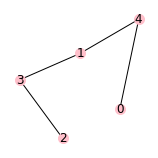

In [9]:
random_graph.process()

###

### Petersen's Graph

In [11]:
incidence_matrix = np.array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                            [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                            [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
                            [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
                            [0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
                            [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
                            [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
                            [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                            [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
                            [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.]])

In [13]:
petersen = GraphMatrix()
petersen.incidence_matrix = incidence_matrix
petersen.compute_remaining_matrices()
print(petersen.adjacency_matrix)

array([[0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]])

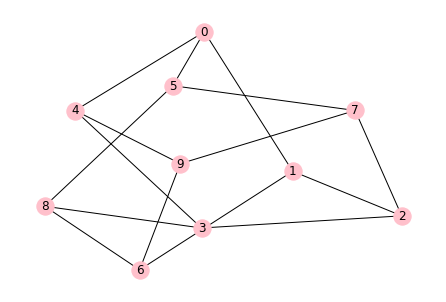

In [17]:

petersen_trees = SpanningTrees(nx.from_numpy_matrix(petersen.adjacency_matrix))
petersen_trees.spanning_trees_count()
petersen_trees.preview()

In [18]:
petersen_trees.process()

/Users/miroslavlzicar/Library/Mobile Documents/com~apple~CloudDocs/GitHub/zapoctove_programy_zkouseni/SpanningTrees.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  return
